In [38]:
%pip install imblearn
%pip install lazypredict
%pip install category_encoders
#import relevant libaries and machine learning frameworks for classification task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
# import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
# import relevant libraries for machine learning pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score
#from# sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
import joblib
import warnings
import category_encoders
import pickle
from numpy import percentile
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import OneHotEncoder, RobustScaler 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier 
from category_encoders import OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from lazypredict.Supervised import LazyClassifier
warnings.filterwarnings('ignore')
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#read out the data
df = pd.read_csv('C:/Users/DONKAMS/Downloads/Project_STA2017/NigeriaAutoInsurance_Vehicle_analyzed.csv')
df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_00N7XT1,2010-07-06,2011-07-05,Female,71,2010-07-06,2,JEEP,Black,REXTON,Badagry,Lagos,Car Classic,0
1,ID_01ZY7FF,2010-08-07,2011-08-06,Male,30,2010-08-07,1,Saloon,Grey,TOYOTA,Ikeja,Lagos,Car Classic,1
2,ID_022U6TV,2010-10-28,2011-10-27,Male,40,2010-10-28,2,Saloon,Black,Honda,Municipal Area Council,Federal Capital Territory,Car Classic,0
3,ID_02DJWEN,2010-01-23,2011-01-16,Male,41,2010-01-23,1,Saloon,Silver,TOYOTA,Apapa,Lagos,Car Classic,0
4,ID_03U3I31,2010-09-06,2011-09-05,Male,39,2010-09-06,2,Saloon,Red,TOYOTA,Oshodi-Isolo,Lagos,Car Classic,0


In [3]:
#check the shape of the data
df.shape

(2667, 14)

<h2 align = 'center'> Basic Modeling </h2>

In [40]:
#split the data into train and test set with 80% training and 20% test
train, test = train_test_split(df, test_size=0.2, random_state=42)
#print the shape of the train and test set
print(train.shape)
print(test.shape)

(2133, 14)
(534, 14)


In [41]:
df.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target'],
      dtype='object')

In [42]:
#Define the features and target variable
features = ['Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName']
labels = 'target'
numerical_features = ['Age', 'No_Pol']
categorical_features = ['Gender','Car_Category','Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State','ProductName']

In [43]:
# train test split
X = train[features]
y = train[labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

#### LogisticRegression

In [44]:
## define preprocessing for numeric features(scale them)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
## define preprocessing for categorical features(encode them)
categorical_transformer = Pipeline(steps=[
    ('label', OneHotEncoder(handle_unknown='ignore'))])
## amalgamate preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])
## create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

## fit the pipeline to train a logistic regression model on the training set
PIPEmodelLR = pipeline.fit(X_train,y_train)
print (PIPEmodelLR)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'No_Pol']),
                                                 ('cat',
                                                  Pipeline(steps=[('label',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Car_Category',
                                                   'Subject_Car_Colour',
                                                   'Subject_Car_Make',
                                                   'LGA_Name', 'State',
                                                   'ProductName'])])),
                ('classifier', LogisticRegression())])


In [45]:
# Evaluation Metrics
PIPEpredictionsLR = PIPEmodelLR.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,PIPEpredictionsLR ))
print(classification_report(y_test, PIPEpredictionsLR))
# Print the confusion matrix
cm = confusion_matrix(y_test, PIPEpredictionsLR)
print (cm)

Accuracy:  0.7859375
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       506
           1       0.41      0.05      0.09       134

    accuracy                           0.79       640
   macro avg       0.60      0.52      0.49       640
weighted avg       0.72      0.79      0.71       640

[[496  10]
 [127   7]]


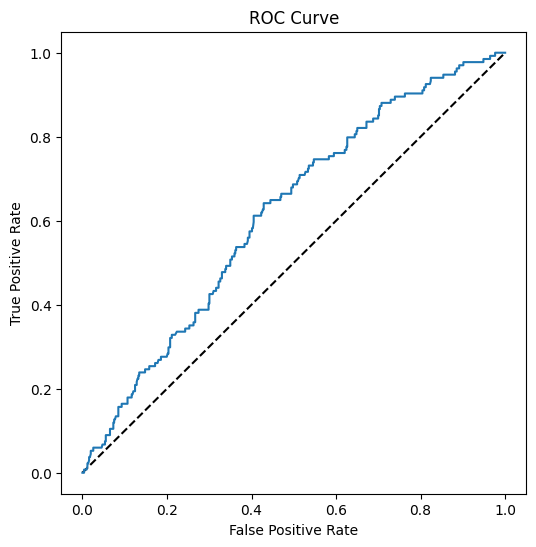

In [46]:
LRprobab = PIPEmodelLR.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, LRprobab[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### DecisionTreeClassifier

In [47]:
## define preprocessing for numeric features(scale them)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
## define preprocessing for categorical features(encode them)
categorical_transformer = Pipeline(steps=[
    ('label', OneHotEncoder(handle_unknown='ignore'))])
## amalgamate preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])
## create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier())])

## fit the pipeline to train a logistic regression model on the training set
PIPEmodelDTC = pipeline.fit(X_train,y_train)
print (PIPEmodelDTC)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'No_Pol']),
                                                 ('cat',
                                                  Pipeline(steps=[('label',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Car_Category',
                                                   'Subject_Car_Colour',
                                                   'Subject_Car_Make',
                                                   'LGA_Name', 'State',
                                                   'ProductName'])])),
                ('classifier', DecisionTreeClassifier())])


In [48]:
# Evaluation Metrics
PIPEpredictionsDTC = PIPEmodelDTC.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,PIPEpredictionsDTC ))
print(classification_report(y_test, PIPEpredictionsDTC))
# Print the confusion matrix
cm = confusion_matrix(y_test, PIPEpredictionsDTC)
print (cm)

Accuracy:  0.6921875
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       506
           1       0.23      0.19      0.21       134

    accuracy                           0.69       640
   macro avg       0.51      0.51      0.51       640
weighted avg       0.68      0.69      0.68       640

[[417  89]
 [108  26]]


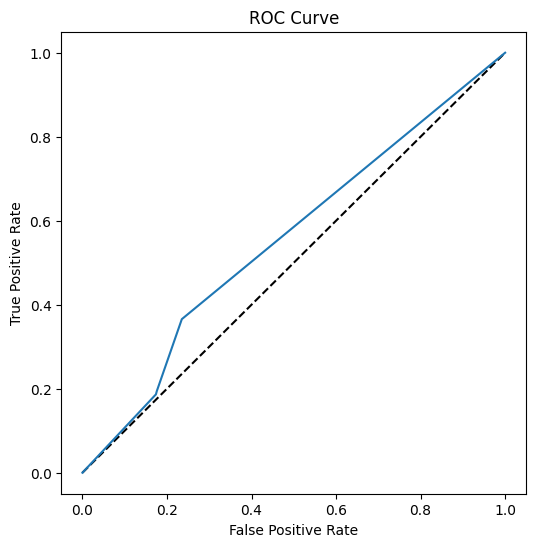

In [49]:
DTCprobab = PIPEmodelDTC.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, DTCprobab[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### KNearestNeighbour

In [50]:
## define preprocessing for numeric features(scale them)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
## define preprocessing for categorical features(encode them)
categorical_transformer = Pipeline(steps=[
    ('label', OneHotEncoder(handle_unknown='ignore'))])
## amalgamate preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])
## create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier())])

## fit the pipeline to train a logistic regression model on the training set
PIPEmodelKNN = pipeline.fit(X_train,y_train)
print (PIPEmodelKNN)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'No_Pol']),
                                                 ('cat',
                                                  Pipeline(steps=[('label',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Car_Category',
                                                   'Subject_Car_Colour',
                                                   'Subject_Car_Make',
                                                   'LGA_Name', 'State',
                                                   'ProductName'])])),
                ('classifier', KNeighborsClassifier())])


In [51]:
# Evaluation Metrics
PIPEpredictionsKNN = PIPEmodelKNN.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,PIPEpredictionsKNN ))
print(classification_report(y_test, PIPEpredictionsKNN))
# Print the confusion matrix
cm = confusion_matrix(y_test, PIPEpredictionsKNN)
print (cm)

Accuracy:  0.75625
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       506
           1       0.26      0.09      0.13       134

    accuracy                           0.76       640
   macro avg       0.53      0.51      0.50       640
weighted avg       0.68      0.76      0.71       640

[[472  34]
 [122  12]]


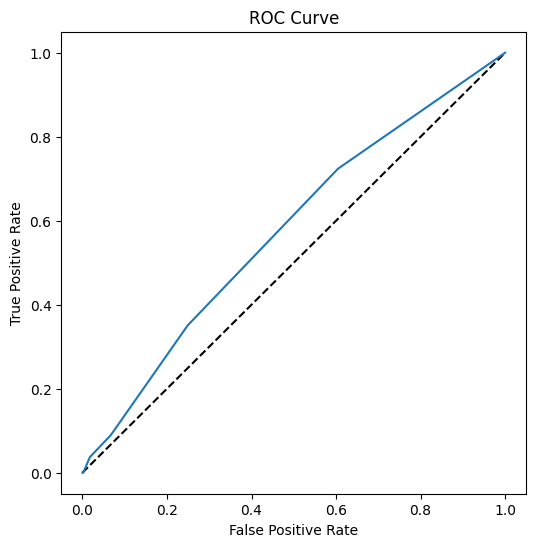

In [52]:
KNNprobab = PIPEmodelKNN.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, KNNprobab[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### SupportVectorMachine

In [53]:
## define preprocessing for numeric features(scale them)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
## define preprocessing for categorical features(encode them)
categorical_transformer = Pipeline(steps=[
    ('label', OneHotEncoder(handle_unknown='ignore'))])
## amalgamate preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])
## create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(probability=True))])

## fit the pipeline to train a logistic regression model on the training set
PIPEmodelSVC = pipeline.fit(X_train,y_train)
print (PIPEmodelSVC)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'No_Pol']),
                                                 ('cat',
                                                  Pipeline(steps=[('label',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Car_Category',
                                                   'Subject_Car_Colour',
                                                   'Subject_Car_Make',
                                                   'LGA_Name', 'State',
                                                   'ProductName'])])),
                ('classifier', SVC(probability=True))])


In [54]:
# Evaluation Metrics
PIPEpredictionsSVC = PIPEmodelSVC.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,PIPEpredictionsSVC ))
print(classification_report(y_test, PIPEpredictionsSVC))
# Print the confusion matrix
cm = confusion_matrix(y_test, PIPEpredictionsSVC)
print (cm)

Accuracy:  0.790625
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       506
           1       0.50      0.01      0.01       134

    accuracy                           0.79       640
   macro avg       0.65      0.50      0.45       640
weighted avg       0.73      0.79      0.70       640

[[505   1]
 [133   1]]


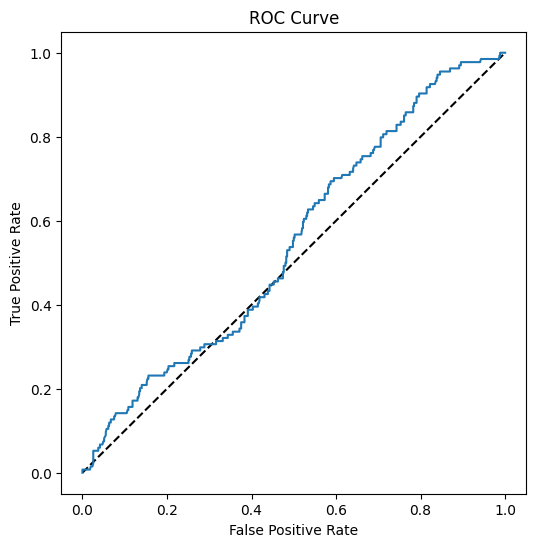

In [55]:
SVCprobab = PIPEmodelSVC.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, SVCprobab[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### GradientBoostingClassifier

In [56]:
## define preprocessing for numeric features(scale them)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
## define preprocessing for categorical features(encode them)
categorical_transformer = Pipeline(steps=[
    ('label', OneHotEncoder(handle_unknown='ignore'))])
## amalgamate preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])
## create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', GradientBoostingClassifier())])

## fit the pipeline to train a logistic regression model on the training set
PIPEmodelGBC = pipeline.fit(X_train,y_train)
print (PIPEmodelGBC)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'No_Pol']),
                                                 ('cat',
                                                  Pipeline(steps=[('label',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Car_Category',
                                                   'Subject_Car_Colour',
                                                   'Subject_Car_Make',
                                                   'LGA_Name', 'State',
                                                   'ProductName'])])),
                ('classifier', GradientBoostingClassifier())])


In [57]:
# Evaluation Metrics
PIPEpredictionsGBC = PIPEmodelGBC.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,PIPEpredictionsGBC ))
print(classification_report(y_test, PIPEpredictionsGBC))
# Print the confusion matrix
cm = confusion_matrix(y_test, PIPEpredictionsGBC)
print (cm)

Accuracy:  0.78125
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       506
           1       0.35      0.05      0.09       134

    accuracy                           0.78       640
   macro avg       0.57      0.51      0.48       640
weighted avg       0.70      0.78      0.71       640

[[493  13]
 [127   7]]


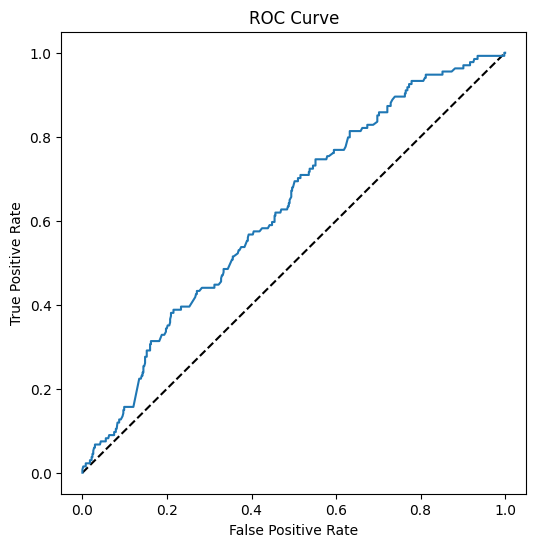

In [58]:
GBCprobab = PIPEmodelGBC.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, GBCprobab[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [62]:
# Assuming models is a list of your trained models
# and names is a list of the names of your models
#provide a list of mytrained models
models = [PIPEmodelLR, PIPEmodelDTC, PIPEmodelKNN, PIPEmodelSVC, PIPEmodelGBC]
names = ["Logistic Regression", "Decision Tree", "KNN", "SVC", "Gradient Boosting"]
metrics = []

for name, model in zip(names, models):
    # Get predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Append metrics to the list
    metrics.append([name, f1, recall, precision])

# Create a DataFrame from the metrics
model_comparison = pd.DataFrame(metrics, columns=["Model", "F1 Score", "Recall", "Precision"])

model_comparison

,Model,F1 Score,Recall,Precision
0,Logistic Regression,0.09,0.05,0.41
1,Decision Tree,0.21,0.19,0.23
2,KNN,0.13,0.09,0.26
3,SVC,0.01,0.01,0.50
4,Gradient Boosting,0.09,0.05,0.35


<h2 align='center'> Feature Engineering </h2>

In [12]:
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
df['Policy End Date'] = pd.to_datetime(df['Policy End Date'])

# Policy Duration
df['Policy Duration'] = (df['Policy End Date'] - df['Policy Start Date']).dt.days

# Extracting Year, Month, Day of Week
df['Policy Start Year'] = df['Policy Start Date'].dt.year
df['Policy Start Month'] = df['Policy Start Date'].dt.month
df['Policy Start Day of Week'] = df['Policy Start Date'].dt.dayofweek

In [13]:
df['Car_Colour_Make'] = df['Subject_Car_Colour'] + "_" + df['Subject_Car_Make']
df['Car_Colour_Category'] = df['Subject_Car_Colour'] + "_" + df['Car_Category']
df['Car_Make_Category'] = df['Subject_Car_Make'] + "_" + df['Car_Category']

In [14]:
bins = [0, 18, 30, 60, 100]
labels = ['Child', 'Young Adult', 'Adult', 'Senior']
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [15]:
df['First Transaction Date'] = pd.to_datetime(df['First Transaction Date'])
df['Days Since First Transaction'] = (df['Policy Start Date'] - df['First Transaction Date']).dt.days

In [16]:
df_encoded = pd.get_dummies(df, columns=['ProductName'])

In [17]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [18]:
df['Age_No_Pol'] = df['Age'] * df['No_Pol']

In [19]:
df.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target', 'Policy Duration', 'Policy Start Year',
       'Policy Start Month', 'Policy Start Day of Week', 'Car_Colour_Make',
       'Car_Colour_Category', 'Car_Make_Category', 'Age_Category',
       'Days Since First Transaction', 'Age_No_Pol'],
      dtype='object')

In [20]:
#shape of df
df.shape

(2667, 24)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            2667 non-null   object        
 1   Policy Start Date             2667 non-null   datetime64[ns]
 2   Policy End Date               2667 non-null   datetime64[ns]
 3   Gender                        2667 non-null   int32         
 4   Age                           2667 non-null   int64         
 5   First Transaction Date        2667 non-null   datetime64[ns]
 6   No_Pol                        2667 non-null   int64         
 7   Car_Category                  2667 non-null   object        
 8   Subject_Car_Colour            2667 non-null   object        
 9   Subject_Car_Make              2667 non-null   object        
 10  LGA_Name                      2667 non-null   object        
 11  State                         

In [22]:
# Convert datetime feature to number of days since a certain date
df['Policy Start Period'] = (df['Policy Start Date'] - pd.Timestamp('1970-01-01')) / pd.Timedelta('1 day')
df['Policy End Period'] = (df['Policy End Date'] - pd.Timestamp('1970-01-01')) / pd.Timedelta('1 day')
df['First Transaction Date Period'] = (df['First Transaction Date'] - pd.Timestamp('1970-01-01')) / pd.Timedelta('1 day')

In [23]:
def split_data():
    X = df.drop(["target",'ID','Policy Start Date','Policy End Date', 'First Transaction Date'],axis=1)
    y = df["target"] 
    return train_test_split(X, y,test_size=0.3,random_state =42)

In [24]:
def resample():
    X_train = split_data()[0]
    y_train = split_data()[2]
    X_train_over, y_train_over = RandomOverSampler(random_state=42).fit_resample(X_train,y_train)
    return X_train_over, y_train_over

In [25]:
def build_model(voting="hard"):
    estimator = [] 
    estimator.append(('LR',  
                      LogisticRegression(solver ='lbfgs',  
                                         multi_class ='multinomial',  
                                         max_iter = 200))) 
    estimator.append(('SVC', SVC(gamma ='auto', probability = True))) 
    estimator.append(('DTC', DecisionTreeClassifier(max_depth=10))) 
    estimator.append(('KNN',KNeighborsClassifier()))
    estimator.append(('RFC', RandomForestClassifier(random_state=42))) 
    estimator.append(('GBC', GradientBoostingClassifier()))

    # Voting Classifier with hard voting 
    # Build Model
    model = make_pipeline(
        OrdinalEncoder(), 
        RobustScaler(),
        VotingClassifier(estimators=estimator, voting=voting) 
    )
    return model

In [26]:
BOMBmodel = build_model()
BOMBmodel

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('robustscaler', RobustScaler()),
                ('votingclassifier',
                 VotingClassifier(estimators=[('LR',
                                               LogisticRegression(max_iter=200,
                                                                  multi_class='multinomial')),
                                              ('SVC',
                                               SVC(gamma='auto',
                                                   probability=True)),
                                              ('DTC',
                                               DecisionTreeClassifier(max_depth=10)),
                                              ('KNN', KNeighborsClassifier()),
                                              ('RFC',
                                               RandomForestClassifier(random_state=42)),
                                              ('GBC',
                                               GradientBoostingClassifier())]))])

In [61]:
TOADmodel = build_model()
X_train_over, y_train_over = resample()
TOADmodel.fit(X_train_over, y_train_over)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Car_Category', 'Subject_Car_Colour',
                                      'Subject_Car_Make', 'LGA_Name', 'State',
                                      'ProductName', 'Car_Colour_Make',
                                      'Car_Colour_Category',
                                      'Car_Make_Category', 'Age_Category'],
                                mapping=[{'col': 'Car_Category',
                                          'data_type': dtype('O'),
                                          'mapping': Saloon                      1
JEEP                        2
Pick Up                     3
Shape Of Vehicle Chasis     4
Truck                       5
Station 4 Wheel             6
Bus                         7
Min...
                ('robustscaler', RobustScaler()),
                ('votingclassifier',
                 VotingClassifier(estimators=[('LR',
                                               LogisticRegression(max_iter=200,
                                                                  multi_class='multinomial')),
                                              ('SVC',
                                               SVC(gamma='auto',
                                                   probability=True)),
                                              ('DTC',
                                               DecisionTreeClassifier(max_depth=10)),
                                              ('KNN', KNeighborsClassifier()),
                                              ('RFC',
                                               RandomForestClassifier(random_state=42)),
                                              ('GBC',
                                               GradientBoostingClassifier())]))])

In [28]:
X_train, X_test, y_train, y_test = split_data()

In [63]:
y_pred = TOADmodel.predict(X_test)
print("Test Accuracy:", round(accuracy_score(y_test, y_pred), 2))

Test Accuracy: 0.69


In [62]:
print("Train Accuracy:", round(TOADmodel.score(X_train, y_train), 2))

Train Accuracy: 0.84


In [64]:
print(classification_report(y_test,TOADmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       653
           1       0.25      0.34      0.29       148

    accuracy                           0.69       801
   macro avg       0.54      0.55      0.54       801
weighted avg       0.73      0.69      0.71       801



In [35]:
TOADmodel.feature_names_in_

['Gender',
 'Age',
 'No_Pol',
 'Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State',
 'ProductName',
 'Policy Duration',
 'Policy Start Year',
 'Policy Start Month',
 'Policy Start Day of Week',
 'Car_Colour_Make',
 'Car_Colour_Category',
 'Car_Make_Category',
 'Age_Category',
 'Days Since First Transaction',
 'Age_No_Pol',
 'Policy Start Period',
 'Policy End Period',
 'First Transaction Date Period']

In [36]:
X_train_over.columns

Index(['Gender', 'Age', 'No_Pol', 'Car_Category', 'Subject_Car_Colour',
       'Subject_Car_Make', 'LGA_Name', 'State', 'ProductName',
       'Policy Duration', 'Policy Start Year', 'Policy Start Month',
       'Policy Start Day of Week', 'Car_Colour_Make', 'Car_Colour_Category',
       'Car_Make_Category', 'Age_Category', 'Days Since First Transaction',
       'Age_No_Pol', 'Policy Start Period', 'Policy End Period',
       'First Transaction Date Period'],
      dtype='object')

In [38]:
# Checking to see if the features are same as the training data columns
all(TOADmodel.feature_names_in_) == all(X_train_over.columns)

True

In [39]:
TOADmodel.named_steps["votingclassifier"].estimators_

[LogisticRegression(max_iter=200, multi_class='multinomial'),
 SVC(gamma='auto', probability=True),
 DecisionTreeClassifier(max_depth=10),
 KNeighborsClassifier(),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier()]

In [65]:
for model in TOADmodel.named_steps["votingclassifier"].estimators_:
    if hasattr(TOADmodel, 'feature_importances_'):
        feature_importances_model = TOADmodel.feature_importances_

In [66]:
print(TOADmodel.named_steps)

{'ordinalencoder': OrdinalEncoder(cols=['Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make',
                     'LGA_Name', 'State', 'ProductName', 'Car_Colour_Make',
                     'Car_Colour_Category', 'Car_Make_Category',
                     'Age_Category'],
               mapping=[{'col': 'Car_Category', 'data_type': dtype('O'),
                         'mapping': Saloon                      1
JEEP                        2
Pick Up                     3
Shape Of Vehicle Chasis     4
Truck                       5
Station 4 Wheel             6
Bus                         7
Mini Bus                    8
Motorcycle                  9
Mini Van                   10
Sedan                      11
Wa...
                         'mapping': TOYOTA_Saloon        1
Ford_JEEP            2
Mercedes_Saloon      3
TOYOTA_JEEP          4
Honda_JEEP           5
                    ..
Volkswagen_Wagon    79
Pontiac_Saloon      80
Kia_Mini Van        81
GMC_JEEP            82
NaN         

In [69]:
from sklearn.inspection import permutation_importance

# Fit your pipeline on the training data
TOADmodel.fit(X_train_over, y_train_over)

# Calculate permutation importances
result = permutation_importance(TOADmodel, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

# Get feature importances
feature_importances = result.importances_mean

# Create a series with feature names and importances
feat_imp = pd.Series(feature_importances, index=features).sort_values(ascending=False)

In [ ]:
# Get feature names from training data
features = X_train_over.columns

# Get feature importances from the model
feature_importances = TOADmodel.named_steps['GBC'].feature_importances_

# Create a series with feature names and importances
feat_imp = pd.Series(feature_importances, index=features).sort_values(ascending=False)

In [ ]:
# Get feature names from training data
features = TOADmodel.feature_names_in_

# Get feature importances from the model
feature_importances = TOADmodel.feature_importances_

# Create a series with feature names and importances
feat_imp = pd.Series(feature_importances, index=features).sort_values(ascending=False)

In [ ]:
# Get feature names from training data
features = TOADmodel.feature_names_in_

# Create a series with feature names and importances
feat_imp = pd.Series(feature_importances_model,index=features).sort_values(ascending=False)

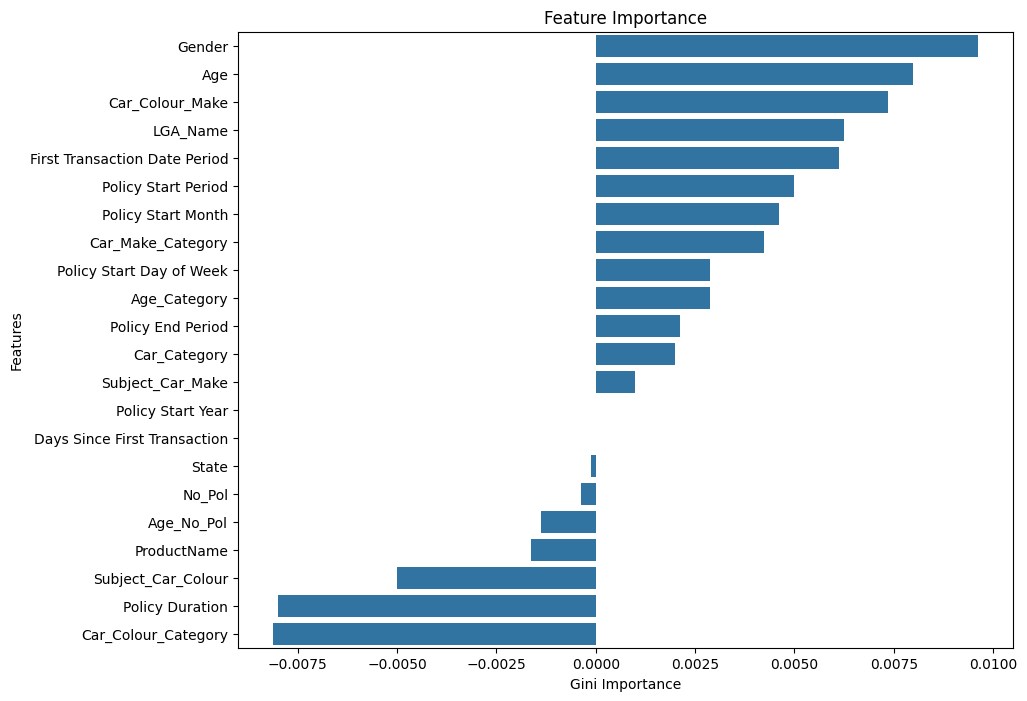

In [70]:
# Create a horizontal bar plot
plt.figure(figsize=(10,8))
sns.barplot(x=feat_imp.values, y=feat_imp.index, orient='h',color=sns.color_palette()[0])
plt.xlabel("Gini Importance")
plt.ylabel("Features")
plt.title("Feature Importance");

In [71]:
#save all model to disk
filename = 'BOMBmodel.sav'
pickle.dump(BOMBmodel, open(filename, 'wb'))

In [72]:
#save TOADmodel to disk
filename = 'TOADmodel.sav'
pickle.dump(TOADmodel, open(filename, 'wb'))